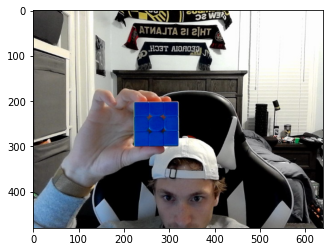

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')    

def drawText(frame, txt, location, color = (50,170,50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

img_bgr = cv2.imread("result.png", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr[:,:,::-1])

In [30]:
img_blur = cv2.blur(img_bgr, (13, 13))

(480, 640, 3)


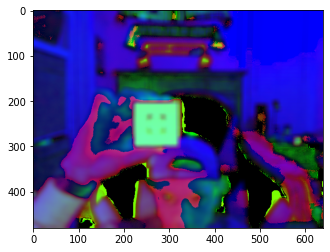

In [31]:
img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
print(img_hsv.shape)
plt.imshow(img_hsv)

(480, 640)
(480, 640, 3)


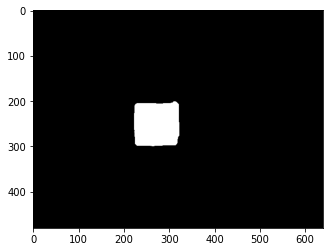

In [32]:
img_thresh = cv2.inRange(img_hsv, (105,150,80), (130,255,255))
plt.imshow(img_thresh, cmap='gray')
print(img_thresh.shape)
print(img_hsv.shape)

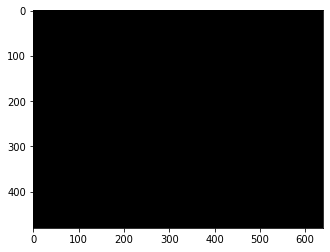

In [33]:
img_rgb_thresh = cv2.inRange(img_rgb, (48,58,179), (0,20,255))
plt.imshow(img_rgb_thresh, cmap='gray')

(204, 228, 90, 87)


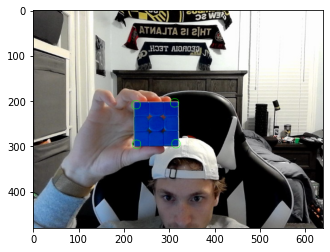

In [34]:
feature_params = dict(  maxCorners = 4,
                        qualityLevel = 0.2,
                        minDistance = 15,
                        blockSize = 9)

corners = cv2.goodFeaturesToTrack(img_thresh, **feature_params)

x_min = int(min(corners[0][0][1], corners[3][0][1]))
y_min = int(min(corners[0][0][0], corners[1][0][0]))
width = int(corners[3][0][1]-corners[1][0][1])
height = int(corners[0][0][0]-corners[1][0][0])
bbox = (x_min, y_min, abs(width), abs(height))
img_rgb_corners = img_rgb.copy()
for x,y in np.float32(corners).reshape(-1,2):
    if corners is not None:
        cv2.circle(img_rgb_corners, (int(x), int(y)), 10, (0, 255, 0), 1)
print(bbox)
plt.imshow(img_rgb_corners)

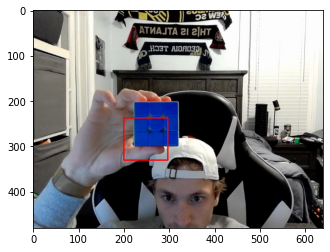

In [35]:
tracker = cv2.TrackerGOTURN_create() 
ok = tracker.init(img_rgb, bbox)

ret, bbox = tracker.update(img_rgb)
if ret:
    drawRectangle(img_rgb, bbox)
else:
    drawText(img_rgb, "Tracking failure detected", (50,50), (255, 255, 0))
plt.imshow(img_rgb)
    


